<a href="https://colab.research.google.com/github/MalamOmer/Model-one/blob/main/hybrid_rf_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RF Alone
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)

# 1) Load dataset
try:
    from google.colab import files
    uploaded = files.upload()
    import io
    df = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]))
except:
    df = pd.read_excel('/content/maternal_moterlity.xlsx')  # adjust path as needed

# 2) Prepare features/target
features = ['ME', 'MA', 'AC']
X = df[features].values
y = df['MM'].values.astype(float)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4) Train RF model
rf = RandomForestRegressor(n_estimators=30, random_state=35)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 5) Evaluate
y_class = (y_pred >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_pred)
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_class),
    'Precision': precision_score(y_test, y_class, zero_division=0),
    'Recall': recall_score(y_test, y_class, zero_division=0),
    'F1': f1_score(y_test, y_class, zero_division=0),
    'AUC': auc(fpr, tpr)
}

print("Random Forest Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

print("\nFeature Importances:")
for feat, imp in zip(features, rf.feature_importances_):
    print(f" - {feat}: {imp:.4f}")



Saving maternal_moterlity .xlsx to maternal_moterlity  (4).xlsx
Random Forest Metrics:
MSE: 0.0751
R2: 0.6622
Accuracy: 0.8951
Precision: 0.9132
Recall: 0.9310
F1: 0.9220
AUC: 0.9579

Feature Importances:
 - ME: 0.1981
 - MA: 0.1221
 - AC: 0.6798


In [ ]:
#ANN Alone
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)

# 1) Load dataset
try:
    from google.colab import files
    uploaded = files.upload()
    import io
    df = pd.read_excel(io.BytesIO(uploaded[next(iter(uploaded))]))
except:
    df = pd.read_excel('/content/maternal_moterlity.xlsx')  # adjust path as needed

# 2) Prepare features/target
features = ['ME', 'MA', 'AC']
X = df[features].values
y = df['MM'].values.astype(float)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Scale features
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# 5) Train ANN model
ann = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=300, random_state=42)
ann.fit(X_train_s, y_train)
y_pred = ann.predict(X_test_s)

# 6) Evaluate
y_class = (y_pred >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_pred)
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'Accuracy': accuracy_score(y_test, y_class),
    'Precision': precision_score(y_test, y_class, zero_division=0),
    'Recall': recall_score(y_test, y_class, zero_division=0),
    'F1': f1_score(y_test, y_class, zero_division=0),
    'AUC': auc(fpr, tpr)
}

print("ANN (MLP) Metrics:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


Saving maternal_moterlity .xlsx to maternal_moterlity  (2).xlsx
ANN (MLP) Metrics:
MSE: 0.0759
R2: 0.6604
Accuracy: 0.8953
Precision: 0.9157
Recall: 0.9275
F1: 0.9216
AUC: 0.9563


Regression Metrics
------------------
MSE: 0.0750
R² : 0.6644

Classification Metrics (threshold=0.5)
--------------------------------------
Accuracy : 0.895
Precision: 0.901
Recall   : 0.945
F1-score : 0.922


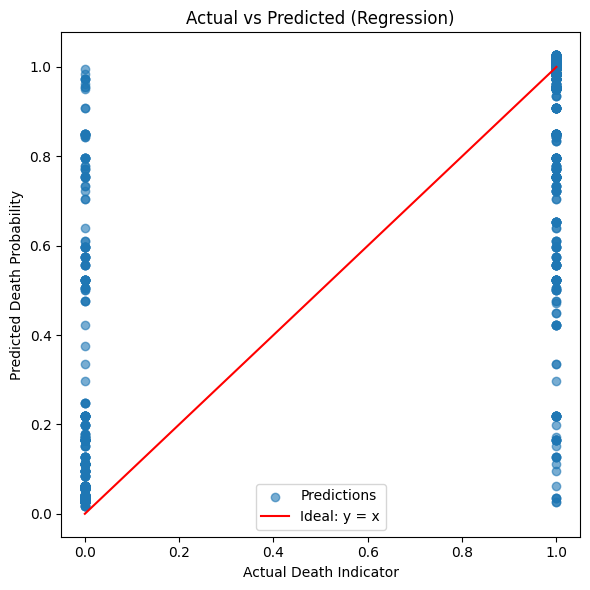

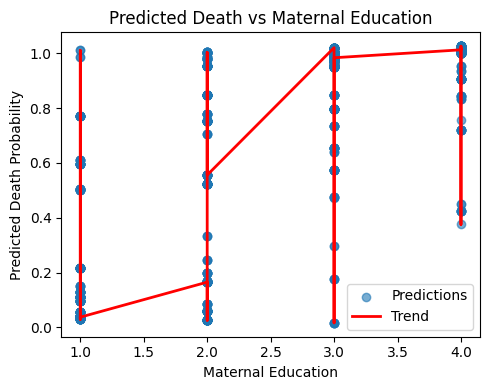

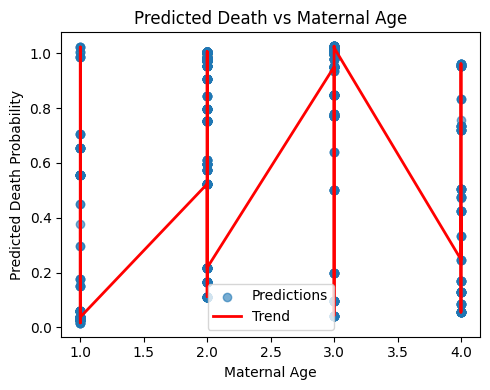

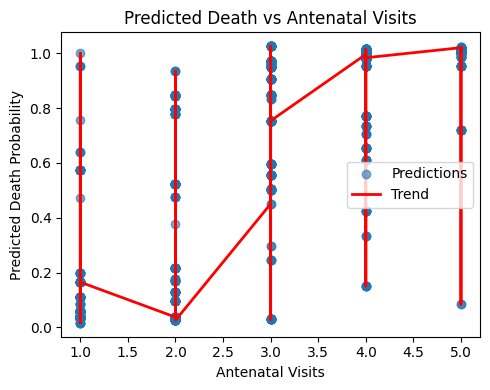

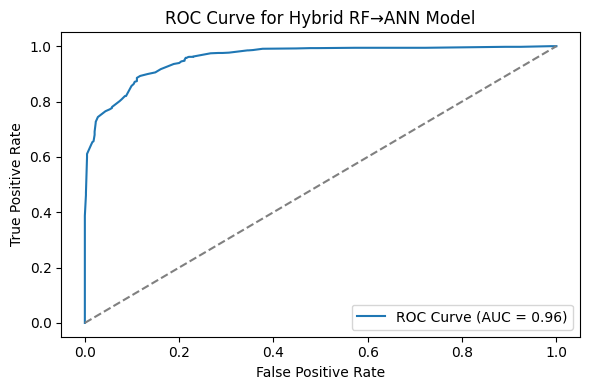

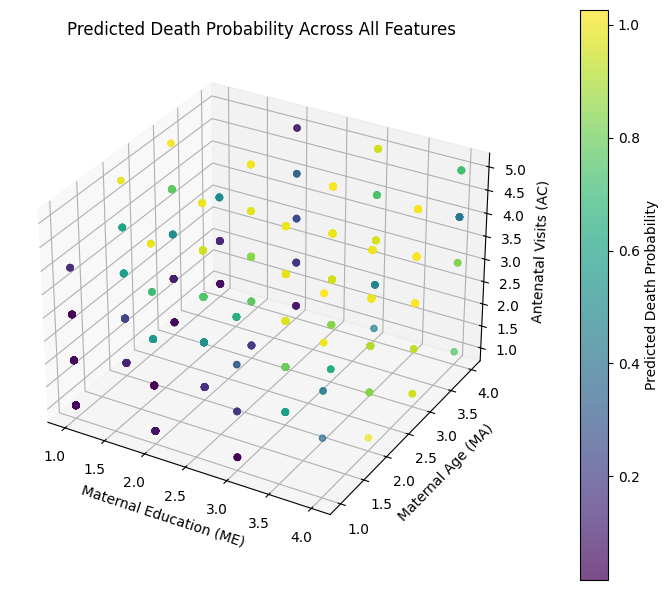


Profile Prediction [ME=1, MA=1, AC=0]: 37.56%


In [ ]:
# Main-hybrid_rf_ann_extended_with_roc_3d.py
# Hybrid Random Forest → ANN Regression Model,
# Combined Line+Scatter Plots, ROC Curve, and 3D Feature Risk Surface

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc
)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# 1. Load the dataset (adjust the path as needed)
df = pd.read_excel('/content/sample_data/maternal_moterlity .xlsx')

# 2. Prepare features and target
X = df[['ME','MA','AC']].values         # ME: education, MA: age, AC: antenatal visits
y = df['MM'].values.astype(float)       # MM: death indicator (0=no, 1=yes)

# 3. Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# 5. Build hybrid features: original + RF prediction
rf_train_pred = rf_reg.predict(X_train).reshape(-1,1)
rf_test_pred  = rf_reg.predict(X_test).reshape(-1,1)
X_train_h = np.hstack([X_train, rf_train_pred])
X_test_h  = np.hstack([X_test,  rf_test_pred])

# 6. Scale hybrid features
scaler = StandardScaler().fit(X_train_h)
X_train_scaled = scaler.transform(X_train_h)
X_test_scaled  = scaler.transform(X_test_h)

# 7. Train ANN Regressor on hybrid data
ann_reg = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=300, random_state=42)
ann_reg.fit(X_train_scaled, y_train)

# 8. Regression evaluation: MSE and R²
y_pred = ann_reg.predict(X_test_scaled)
print("Regression Metrics")
print("------------------")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² : {r2_score(y_test, y_pred):.4f}")

# 9. Classification metrics (threshold = 0.5)
y_class_pred = (y_pred >= 0.5).astype(int)
print("\nClassification Metrics (threshold=0.5)")
print("--------------------------------------")
print(f"Accuracy : {accuracy_score(y_test, y_class_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_class_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_class_pred):.3f}")
print(f"F1-score : {f1_score(y_test, y_class_pred):.3f}")

# 10. Plot: Actual vs Predicted with line + scatter
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')
plt.plot([0,1],[0,1],'r-', label='Ideal: y = x')
plt.xlabel('Actual Death Indicator')
plt.ylabel('Predicted Death Probability')
plt.title('Actual vs Predicted (Regression)')
plt.legend()
plt.tight_layout()
plt.show()

# 11. Plot Predicted Probability vs Each Feature with line + scatter
feature_names = ['Maternal Education','Maternal Age','Antenatal Visits']
for i, name in enumerate(feature_names):
    xi = X_test[:, i]
    order = np.argsort(xi)
    xi_sorted = xi[order]
    yi_sorted = y_pred[order]
    plt.figure(figsize=(5,4))
    plt.scatter(xi, y_pred, alpha=0.6, label='Predictions')
    plt.plot(xi_sorted, yi_sorted, 'r-', linewidth=2, label='Trend')
    plt.xlabel(name)
    plt.ylabel('Predicted Death Probability')
    plt.title(f'Predicted Death vs {name}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 12. ROC Curve for the hybrid model
y_proba_rf_ann = y_pred  # continuous regression output as “probability”
fpr, tpr, _ = roc_curve(y_test, y_proba_rf_ann)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hybrid RF→ANN Model')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 13. 3D Scatter: Predicted Death Probability vs (ME, MA, AC)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    X_test[:,0], X_test[:,1], X_test[:,2],
    c=y_pred, cmap='viridis', alpha=0.7
)
ax.set_xlabel('Maternal Education (ME)')
ax.set_ylabel('Maternal Age (MA)')
ax.set_zlabel('Antenatal Visits (AC)')
ax.set_title('Predicted Death Probability Across All Features')
cbar = fig.colorbar(sc, pad=0.1)
cbar.set_label('Predicted Death Probability')
plt.tight_layout()
plt.show()

# 14. Profile prediction example
profile = np.array([[4, 1, 2]])   # ME=1, MA=1, AC=4
rf_prof = rf_reg.predict(profile).reshape(-1,1)
profile_h = np.hstack([profile, rf_prof])
profile_scaled = scaler.transform(profile_h)
profile_pred = ann_reg.predict(profile_scaled)[0]
print(f"\nProfile Prediction [ME=1, MA=1, AC=0]: {profile_pred:.2%}")

